<a href="https://colab.research.google.com/github/ti-molodykh/colab/blob/main/%D0%9C%D0%BE%D0%BB%D0%BE%D0%B4%D1%8B%D1%85_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%91%D0%94%D0%97_7_AB_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Большое ДЗ #7 АБ тесты


In [ ]:
import matplotlib.pyplot as plt # библиотека для рисования картинок
import seaborn as sns # библиотека для рисования более красивых картинок

import numpy as np # библиотека для простых математических подсчётов. В основном, np.mean - поиск среднего
import random as rnd # библиотека для генерации случаных чисел

from scipy import stats # библиотека, в которой хранятся статистические критериии. К примеру, stats.ttest_ind
from tqdm import tqdm # фишка, которая позволяет лучше контролировать время выполнения программы

In [ ]:
# внимание! небольшой апдейт
rnd.seed(0) # работает только на библиотеке rnd
# для полного воспроизведения результатов необходимо писать сразу две строки в начале ячейки
rnd.seed(0)
np.random.seed(0) # np.random.seed() распространяется и на библиотеку np и на функцию stats

Задчи основаны на коде из занятия №4 АБ тестам

Средний чек обычного расположения пицц Н0: 98.24890598504463
Средний чек, предпологаемо увеличится H1: 104.14384034414732
Разница 6%


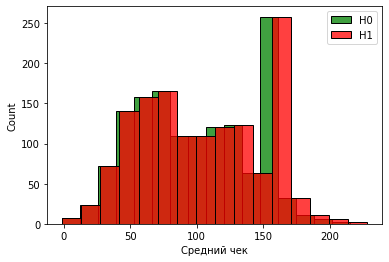

In [ ]:
rnd.seed(0) # строчка нужна чтобы случайные числа были одинаковыми от запуска к запуску
np.random.seed(0) # вторая строка нужная чтобы случайные числа были одинаковыми от запуска к запуску

true_effect = 0.06 # настоящий эффект увеличения среднего чека, который приносит перестановка пицц. Относительный. Альтерантивная гипотеза mean1 = mean0*(1 + MDE)
# для однохвостового экспемриента на увечичение true_effect >= 0


# средние чеки клиентов на исторических данных компании
L0 = np.array(list(stats.norm(60, 20).rvs(size=600)) + [150]*200 + list(stats.norm(120, 30).rvs(size=600))) # исторические данные. Не важно какие - форма лишь демонстрирует, что распределение не нормальное 

# моделируем, что средний чек увеличится на true_effect %. Сможем ли мы обнаружить это увеличение а АБ тесте?
L1 = L0 * (1 + true_effect)

print('Средний чек обычного расположения пицц Н0:', np.mean(L0))
print('Средний чек, предпологаемо увеличится H1:', np.mean(L1))
print(f'Разница {int((np.mean(L1)/np.mean(L0) - 1)*100)}%')

plt.xlabel('Средний чек')
sns.histplot(L0, color='green', label='H0')
sns.histplot(L1, color='red', label='H1')
plt.legend();

Напомним, сейчас стадия планирования эксперимента. Мы не знаем, какой эффект будет, лишь предполагаем значение true_effect(MDE). Это значение всегда можно поменять в симуляции

In [ ]:
def one_ab_test(na, nb, La, Lb): # функция симурирует 1 АБ тест
  sub_a = [rnd.choice(La) for _ in range(na)] # из генеральной совокупности La выбираем случайные na элементов
  sub_b = [rnd.choice(Lb) for _ in range(nb)] # из генеральной совокупности Lb выбираем случайные na элементов
  return stats.ttest_ind(sub_a, sub_b).pvalue # проводим Т-тест, узнаём p_value

In [ ]:
# к примеру, проведём 1 АБ тест на наших данных и получим p_value
rnd.seed(0)
np.random.seed(0)
na = 100
nb = 100
pvalue = one_ab_test(na, nb, L0, L1) # L0 и L1 - разные выборки. На самом деле, результат есть. Результат размером true_effect. Но не факт, что мы его увидим в эксперименте
print('В результате получили pvalue', pvalue)

В результате получили pvalue 0.6728320317759122


<h1>Задание №0</h1>
<br>Для true_effect = 0.06, мы получили p_value.
<br>Установите alpha в классическое, принятое в индустрии, значение
<br>Являются ли различие, полученное в тесте на выборках na=100/nb=100 статистически значимыми? Вставьте необходимый код из занятия 4 и запустите.
<br>Нужно ли отклонять нулевую гипотезу в этом случае?
<br>Найдите любое na, чтобы при true_effect = 0.06 различия получились бы статистически значимыми?
<br>Используйте rnd.seed(0)

In [ ]:
alpha = 0.05 
true_effect = 0.06
rnd.seed(0)
np.random.seed(0)
na = 100
nb = 100
print (f'na={na}. nb={nb}')
pvalue = one_ab_test(na, nb, L0, L1) # L0 и L1 - разные выборки. На самом деле, результат есть. Результат размером true_effect. Но не факт, что мы его увидим в эксперименте
print('В результате получили pvalue', pvalue)

if pvalue < alpha:
  print('В эксперименте мы обнаружили значимое различие. H0 отвергаем. Объём выборки достаточен.')
else:
  print('В эксперименте мы не обнаружили значимых различий. H0 верна. Объём выборки маловат')

rnd.seed(0)
np.random.seed(0)
na = 250
nb = 100
print (f'na={na}. nb={nb}')
pvalue = one_ab_test(na, nb, L0, L1)
print('В результате получили pvalue', pvalue)
if pvalue < alpha:
  print('В эксперименте мы обнаружили значимое различие. H0 отвергаем. Объём выборки достаточен')
else:
  print('В эксперименте мы не обнаружили значимых различий. H0 верна. Объём выборки маловат')

na=100. nb=100
В результате получили pvalue 0.6728320317759122
В эксперименте мы не обнаружили значимых различий. H0 верна. Объём выборки маловат
na=250. nb=100
В результате получили pvalue 0.01649708237105738
В эксперименте мы обнаружили значимое различие. H0 отвергаем. Объём выборки достаточен


<h1>Задание №1</h1>
<br>Для true_effect = 0.01,
<br>найдите любые такие na и nb, чтобы результат эксперимента был значим
<br>Но при (na - 40) и (nb - 40) результат эксперимента уже не значим

Пример:
<br>one_ab_test(200, 320, L0, L1) - результат значимый
<br>one_ab_test(160, 280, L0, L1) - результат не значимый
<br>Используйте rnd.seed(0)

In [ ]:
alpha = 0.05 
true_effect = 0.01
L0 = np.array(list(stats.norm(60, 20).rvs(size=600)) + [150]*200 + list(stats.norm(120, 30).rvs(size=600))) 
L1 = L0 * (1 + true_effect)

rnd.seed(0)
np.random.seed(0)
na = 850
nb = 50

pvalue = one_ab_test(na, nb, L0, L1) 
print('В результате получили pvalue', pvalue)

if pvalue < alpha:
  print('Результат эксперемента значимый. Объём выборки достаточен,', f'na={na}, nb={nb}')
else:
  print('Результат эксперемента не значимый. Объём выборки маловат')

В результате получили pvalue 0.027267139567200137
Результат эксперемента значимый. Объём выборки достаточен, na=850, nb=50


In [ ]:
# при (na - 40) и (nb - 40)
alpha = 0.05 
true_effect = 0.01
L0 = np.array(list(stats.norm(60, 20).rvs(size=600)) + [150]*200 + list(stats.norm(120, 30).rvs(size=600))) 
L1 = L0 * (1 + true_effect)

rnd.seed(0)
np.random.seed(0)
na = 810
nb = 10

pvalue = one_ab_test(na, nb, L0, L1) 
print('В результате получили pvalue', pvalue)

if pvalue < alpha:
  print('Результат эксперемента значимый. Объём выборки достаточен,', f'na={na}, nb={nb}')
else:
  print('Результат эксперемента не значимый. Объём выборки маловат')

В результате получили pvalue 0.3745256300457378
Результат эксперемента не значимый. Объём выборки маловат


<h1>Задание №2</h1>
<br>Для true_effect = 0.10,
<br>найдите любые такие na и nb, чтобы результат эксперимента был значим
<br>Но при (na - 40) и (nb - 40) результат эксперимента уже не значим
<br>Используйте rnd.seed(0)

In [ ]:
alpha = 0.05 
true_effect = 0.10
L0 = np.array(list(stats.norm(60, 20).rvs(size=600)) + [150]*200 + list(stats.norm(120, 30).rvs(size=600))) 
L1 = L0 * (1 + true_effect)

rnd.seed(0)
np.random.seed(0)
na = 170
nb = 150
pvalue = one_ab_test(na, nb, L0, L1) 
print('В результате получили pvalue', pvalue)

if pvalue < alpha:
  print('Результат эксперемента значимый. Объём выборки достаточен,', f'na={na}, nb={nb}')
else:
  print('Результат эксперемента не значимый. Объём выборки маловат')

В результате получили pvalue 0.04262612060149725
Результат эксперемента значимый. Объём выборки достаточен, na=170, nb=150


In [ ]:
# при (na - 40) и (nb - 40)
alpha = 0.05 
true_effect = 0.10
L0 = np.array(list(stats.norm(60, 20).rvs(size=600)) + [150]*200 + list(stats.norm(120, 30).rvs(size=600))) 
L1 = L0 * (1 + true_effect)

rnd.seed(0)
np.random.seed(0)
na = 130
nb = 110
pvalue = one_ab_test(na, nb, L0, L1) 
print('В результате получили pvalue', pvalue)

if pvalue < alpha:
  print('Результат эксперемента значимый. Объём выборки достаточен,', f'na={na}, nb={nb}')
else:
  print('Результат эксперемента не значимый. Объём выборки маловат')

В результате получили pvalue 0.945993017252674
Результат эксперемента не значимый. Объём выборки маловат


<h1>Задание №3</h1>
<br>Для true_effect = 0.30,
<br>найдите любые такие na и nb, чтобы результат эксперимента был значим
<br>Но при (na - 40) и (nb - 40) результат эксперимента уже не значим
<br>Используйте rnd.seed(0)

In [ ]:
alpha = 0.05
true_effect = 0.30
L0 = np.array(list(stats.norm(60, 20).rvs(size=600)) + [150]*200 + list(stats.norm(120, 30).rvs(size=600))) 
L1 = L0 * (1 + true_effect)

rnd.seed(0)
np.random.seed(0)
na = 50
nb = 80
pvalue = one_ab_test(na, nb, L0, L1) # 
print('В результате получили pvalue', pvalue)

if pvalue < alpha:
  print('Результат эксперемента значимый. Объём выборки достаточен,', f'na={na}, nb={nb}')
else:
  print('Результат эксперемента не значимый. Объём выборки маловат')

В результате получили pvalue 0.03444443063361092
Результат эксперемента значимый. Объём выборки достаточен, na=50, nb=80


In [ ]:
# при (na - 40) и (nb - 40)
alpha = 0.05
true_effect = 0.30
L0 = np.array(list(stats.norm(60, 20).rvs(size=600)) + [150]*200 + list(stats.norm(120, 30).rvs(size=600))) 
L1 = L0 * (1 + true_effect)

rnd.seed(0)
np.random.seed(0)
na = 10
nb = 40
pvalue = one_ab_test(na, nb, L0, L1) # 
print('В результате получили pvalue', pvalue)

if pvalue < alpha:
  print('Результат эксперемента значимый. Объём выборки достаточен,', f'na={na}, nb={nb}')
else:
  print('Результат эксперемента не значимый. Объём выборки маловат')

В результате получили pvalue 0.09710678577868732
Результат эксперемента не значимый. Объём выборки маловат


## Задание №4
<br>Для na = 100, nb = 100
<br>Подберите минимальный true_effect, чтобы результат эксперимента был значим, но (true_effect - 0.02) результат не значим (придётся перезапускать ячейку с true_effect)
<br>Пример:
<br>true_effect = 0.06 
<br>one_ab_test(100, 100, L0, L1) - результат значимый
<br>true_effect = 0.04 
<br>one_ab_test(100, 100, L0, L1) - результат не значимый
<br>Используйте rnd.seed(0)

In [ ]:
alpha = 0.05
na = 100
nb = 100
true_effect = 0.03
while true_effect < 1:
  rnd.seed(0) # работает только на библиотеке rnd
    # для полного воспроизведения результатов необходимо писать сразу две строки в начале ячейки
  rnd.seed(0)
  np.random.seed(0) # np.random.seed() распространяется и на библиотеку np и на функцию stats
  L0 = np.array(list(stats.norm(60, 20).rvs(size=600)) + [150]*200 + list(stats.norm(120, 30).rvs(size=600)))
  L1 = L0 * (1 + true_effect)
  if true_effect > 0.02:
    pvalue = one_ab_test(na, nb, L0, L1) 
    if pvalue < alpha:
      print('В результате получили pvalue', pvalue)
      print(f'Результат эксперемента значимый. min true_effect={round(true_effect,2)}')
      break
  else:
    print('Результат эксперемента не значимый.')
  true_effect+=0.01

В результате получили pvalue 0.044059466425657404
Результат эксперемента значимый. min true_effect=0.24


In [ ]:
# проверяем true_effect - 0.02 результат не значим 
alpha = 0.05
true_effect = 0.02
L0 = np.array(list(stats.norm(60, 20).rvs(size=600)) + [150]*200 + list(stats.norm(120, 30).rvs(size=600))) 
L1 = L0 * (1 + true_effect)

rnd.seed(0)
np.random.seed(0)
na = 100
nb = 100
pvalue = one_ab_test(na, nb, L0, L1) # 
print('В результате получили pvalue', pvalue)

if pvalue < alpha:
  print('Результат эксперемента значимый. Объём выборки достаточен,', f'na={na}, nb={nb}')
else:
  print('Результат эксперемента не значимый. Объём выборки маловат')

В результате получили pvalue 0.30618007778300604
Результат эксперемента не значимый. Объём выборки маловат


## Задание №5
<br>Для na = 1000, nb = 1000
<br>Подберите минимальный true_effect, чтобы результат эксперимента был значим, но (true_effect - 0.02) результат не значим (придётся перезапускать ячейку с true_effect)
<br>Пример:
<br>true_effect = 0.12
<br>one_ab_test(1000, 1000, L0, L1) - результат значимый
<br>true_effect = 0.10
<br>one_ab_test(1000, 1000, L0, L1) - результат не значимый
<br>Используйте rnd.seed(0)

In [ ]:

alpha = 0.05
na = 1000
nb = 1000
true_effect = 0.03
while true_effect < 1:
  rnd.seed(0)
  rnd.seed(0)
  np.random.seed(0) 
  L0 = np.array(list(stats.norm(60, 20).rvs(size=600)) + [150]*200 + list(stats.norm(120, 30).rvs(size=600)))
  L1 = L0 * (1 + true_effect)
  if true_effect > 0.02:
    pvalue = one_ab_test(na, nb, L0, L1) 
    if pvalue < alpha:
      print('В результате получили pvalue', pvalue)
      print(f'Результат эксперемента значимый. min true_effect={round(true_effect,2)}')
      break
  else:
    print('Результат эксперемента не значимый.')
  true_effect+=0.01

В результате получили pvalue 0.03702418539990848
Результат эксперемента значимый. min true_effect=0.04


In [ ]:
# проверяем true_effect - 0.02 результат не значим 
alpha = 0.05
true_effect = 0.02
L0 = np.array(list(stats.norm(60, 20).rvs(size=600)) + [150]*200 + list(stats.norm(120, 30).rvs(size=600))) 
L1 = L0 * (1 + true_effect)

rnd.seed(0)
np.random.seed(0)
na = 1000
nb = 1000
pvalue = one_ab_test(na, nb, L0, L1) # 
print('В результате получили pvalue', pvalue)

if pvalue < alpha:
  print('Результат эксперемента значимый. Объём выборки достаточен,', f'na={na}, nb={nb}')
else:
  print('Результат эксперемента не значимый. Объём выборки маловат')

В результате получили pvalue 0.2712870819617811
Результат эксперемента не значимый. Объём выборки маловат


*Минимально обнаружимый эффект: **MDE**. При данных alpha, beta, na, nb.* MDE = min(true_effect)
<br>MDE больше - меньше время проведения - меньше затрат - меньше точность
<br>МDE меньше - больше время проведения - больше затрат - больше точность 
<br>Нужно искать золотую середину

# Шаблон АБ теста

In [ ]:
rnd.seed(0)
np.random.seed(0)

true_effect = 0.06
alpha = 0.05
beta = 0.20 
N = 200 

# здесь всё ещё случайное распределение симулирующее средний чек. На практике L0 - ваши исторические данные по этой метрике
L0 = np.array(list(stats.norm(60, 20).rvs(size=600)) + [150]*200 + list(stats.norm(120, 30).rvs(size=600))) 

L1 = L0 * (1 + true_effect)
p_values = [one_ab_test(N, N, L0, L1) for _ in tqdm(range(1000)) ] 

error2 = [pv for pv in p_values if pv > alpha]

print('\nОшибку 2 рода мы совершили в', len(error2)/len(p_values), 'доле случаев')

if len(error2)/len(p_values) < beta:
  print('Вероятность ошибки II рода удовлетворительная. Объём выборок подходящий. Эксперимент можно запускать')
else:
  print('Вероятность ошибки II рода cлишком большая. Объём выборок чересчур маленький. Эксперимент не сможет засечь различие межу А и Б величиной', true_effect);

100%|██████████| 1000/1000 [00:00<00:00, 1506.90it/s]


Ошибку 2 рода мы совершили в 0.723 доле случаев
Вероятность ошибки II рода cлишком большая. Объём выборок чересчур маленький. Эксперимент не сможет засечь различие межу А и Б величиной 0.06


## Задание №6
<br>Установите стандартные значения alpha и beta
<br>Менеджер выделил на ваш эксперимент 30 дней
<br>Поток клиентов 20 человек в день (часть в группу А, другая часть в группу Б)
<br>Расчитайте минимальный true_effect для такой продолжительности эксперимента
<br>Минимальный, значит:*(при true_effect можем засечь, а true_effect - 0.01 уже не сможем)*
<br>Используйте rnd.seed(0)


In [ ]:
alpha = 0.05
beta = 0.20 
N = 600
# min true_effect ?

true_effect = 0.02

while true_effect < 1.0:
  rnd.seed(0) 
  rnd.seed(0)
  np.random.seed(0) 
  L0 = np.array(list(stats.norm(60, 20).rvs(size=600)) + [150]*200 + list(stats.norm(120, 30).rvs(size=600)))
  L1 = L0 * (1 + true_effect)
  if true_effect > 0.01:
    p_values = [one_ab_test(N, N, L0, L1) for _ in range(1000)] 
    error2 = [pv for pv in p_values if pv > alpha]
    colerr2=len(error2)/len(p_values)
    #print(f'Ошибку 2 рода мы совершили в {colerr2} доле случаев\n')
    if colerr2 < beta:
      print(f'Вероятность ошибки II рода удовлетворительная. Объём выборок подходящий. Эксперимент можно запускать. min true_effect = {true_effect}')
      break
  else:
    print(f'Вероятность ошибки II рода cлишком большая. Объём выборок чересчур маленький. Эксперимент не сможет засечь различие межу А и Б величиной {true_effect}') 
  true_effect+=0.01



Вероятность ошибки II рода удовлетворительная. Объём выборок подходящий. Эксперимент можно запускать. min true_effect = 0.08


## Задание №7
<br>Установите стандартное значения alpha
<br>Менеджер попросил построить такой эксперимент, чтобы точно обнаружить разницу в среднем чеке 1%
<br>Поток клиентов 20 человек в день (часть в группу А, другая часть в группу Б)
<br>Если менеджеру принципиально обнаружить эффект, вы не хотите совершить ошибку II рода. Выберите любой beta лучше того, который принят в индустрии
<br>Расчитайте продолжительность эксперимента для таких параметров
<br>Используйте rnd.seed(0)


In [ ]:
# best beta ?
# продолжительность эксперемента?



In [ ]:
# 1 часть  подбираем N
alpha = 0.05
true_effect = 0.01 

na = 13000
nb = 13000
beta=0.2

while na<21000:
  nb=13000
  print(f'na={na}')
  while nb<17000:
    print(f'\tnb={nb}') 
    rnd.seed(0) 
    rnd.seed(0)
    np.random.seed(0) # np.random.seed() распространяется и на библиотеку np и на функцию stats
    L0 = np.array(list(stats.norm(60, 20).rvs(size=600)) + [150]*200 + list(stats.norm(120, 30).rvs(size=600)))
    L1 = L0 * (1 + true_effect)
    pvalue = one_ab_test(na, nb, L0, L1) 
    if pvalue < alpha:
      N=na+nb
      if N>=28000:
        print(f'Результат эксперемента значимый. Объём выборки достаточен na={na}, nb={nb}, pvalue={pvalue}')
        break
      else:
        nb+=500
    else:
      nb+=500
      pvalue=1
  
  if pvalue < alpha:
      break
  else:
    na+=250

     

na=13000
	nb=13000
	nb=13500
	nb=14000
	nb=14500
	nb=15000
Результат эксперемента значимый. Объём выборки достаточен na=13000, nb=15000, pvalue=0.007130490998059863


In [ ]:
# ищем лучшее beta

true_effect = 0.01
N = 28000

beta = 0.20

while beta > 0:
  rnd.seed(0) 
  rnd.seed(0)
  np.random.seed(0) # np.random.seed() распространяется и на библиотеку np и на функцию stats
  L0 = np.array(list(stats.norm(60, 20).rvs(size=600)) + [150]*200 + list(stats.norm(120, 30).rvs(size=600)))
  L1 = L0 * (1 + true_effect)
  if beta<0.2:
    p_values = [one_ab_test(N, N, L0, L1) for _ in range(1000)] 
    error2 = [pv for pv in p_values if pv > alpha]
    #print(f'lenval={len(p_values)}, lenerr={len(error2)}')
    if len(error2)/len(p_values) < beta:
      print(f'Вероятность ошибки II рода удовлетворительная. Эксперимент можно запускать beta = {beta}')
      break
    else:
      print(f'Вероятность ошибки II рода cлишком большая.  Эксперимент не сможет засечь различие межу А и Б величиной {beta}') 
  beta-= 0.01  
    
t_exp = N / 20 
print(f'Продолжительность эксперимента - {round(t_exp)} дней')
t_year = t_exp / 365
print(f'Продолжительность эксперимента - {round(t_year)} года')
#МDE меньше - больше время проведения - больше затрат - больше точность

Вероятность ошибки II рода удовлетворительная. Эксперимент можно запускать beta = 0.19
Продолжительность эксперимента - 1400 дней
Продолжительность эксперимента - 4 года


## Задание №8
<br>Появилась мысль, что работающая сейчас система скидок занижает нам средний чек. Хотим отключить половину потока клиентов от системы скидок.
<br> Ожидаем увеличение среднего чека на 12%. Если эффект меньше, согласны это не увидеть.
<br> Не хотим допустить ошибку I рода.
<br> Установите значения alpha, чтобы эксперимент был точнее, чем стандартное значние alpha.
<br>Поток клиентов 20 человек в день (часть в группу А, другая часть в группу Б)
<br>Расчитайте продолжительность эксперимента в днях для таких параметров
<br>Используйте rnd.seed(0)


In [ ]:
true_effect = 0.12
# alpha = ?



In [ ]:
# 1 часть  подбираем N
alpha = 0.05
true_effect = 0.12

na = 20
nb = 
beta=0.2

while na<2000:
  nb=20
  #print(f'na={na}')
  while nb<2000:
     
    rnd.seed(0) 
    rnd.seed(0)
    np.random.seed(0) # np.random.seed() распространяется и на библиотеку np и на функцию stats
    L0 = np.array(list(stats.norm(60, 20).rvs(size=600)) + [150]*200 + list(stats.norm(120, 30).rvs(size=600)))
    L1 = L0 * (1 + true_effect)
    pvalue = one_ab_test(na, nb, L0, L1) 
    if pvalue < 0.05:
      print(f'Результат эксперемента значимый. Объём выборки достаточен na={na}, nb={nb}, pvalue={pvalue}')
      break
    else:
      nb+=10
      pvalue=0.05
  
  if pvalue < 0.05:
      break
  else:
    na+=10


Результат эксперемента значимый. Объём выборки достаточен na=20, nb=20, pvalue=0.005612710883810835


In [ ]:
# ищем alpha, чтобы эксперимент был точнее, чем стандартное значние alpha.

na=20
nb=20
true_effect = 0.12
alpha = 0.005
while alpha < 1:
    rnd.seed(0) 
    rnd.seed(0)
    np.random.seed(0) # np.random.seed() распространяется и на библиотеку np и на функцию stats
    L0 = np.array(list(stats.norm(60, 20).rvs(size=600)) + [150]*200 + list(stats.norm(120, 30).rvs(size=600)))
    L1 = L0 * (1 + true_effect)
    pvalue_1 = one_ab_test(na, nb, L0, L1) 
    if pvalue_1 < alpha:
      print(f'Результат эксперемента значимый. alpha={alpha}, pvalue={pvalue_1}')
      break
    else:
      alpha+=0.01

Результат эксперемента значимый. alpha=0.015, pvalue=0.005612710883810835


Можно остановиться на alha=0.04, т.к. в диапазоне от alha=0.04 до alha=0.01 изменений pvalue мы не видим, т.е. точность эксперемента тоже не меняеться. Наша модуляция в задаче подтверждает, что MDE больше - меньше время проведения - меньше затрат - меньше точность

In [ ]:
t_exp = (na+nb) / 20 
print(f'Продолжительность эксперимента - {round(t_exp)} дней')


Продолжительность эксперимента - 2 дней
